# Pharmacodynamics
## AceHill model

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
def Hill(x, n = 1):
    return x**n / (1 + x**n)

In [3]:
def compute_isobole(f, x1_list):
    x2_list = []
    for x1 in x1_list:
        x2, _, result, _ = fsolve(lambda x2: f(x1, x2) - 140, 1, full_output=True)
        
        if result == 1 and x2 >= 0:
            x2_list.append(x2[0])
        else:
            x2_list.append(np.nan)

    return np.array(x2_list)

In [4]:
log_x_list = np.logspace(-1, 1, 101)
x_list = np.linspace(0, 10, 101)

f_1 = lambda x: 200 * Hill(2/3 * (1 + x*4))
f_2 = lambda x: 200 * Hill(2/3 * (1 + x*2))
f_sum_ref = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4 + x2*2))
sum_ref = f_sum_ref(log_x_list, log_x_list)
isobole_ref = compute_isobole(f_sum_ref, x_list)

def plot_effect_and_isobole(f_1, f_2, f_sum):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.45))
    ax1.semilogx(log_x_list, f_1(log_x_list), label='X1')
    ax1.semilogx(log_x_list, f_2(log_x_list), label='X2')
    ax1.semilogx(log_x_list, sum_ref, c='k', ls='--', label='X1+X2 (additive)')
    ax1.semilogx(log_x_list, f_sum(log_x_list, log_x_list), c='k', lw=3, label='X1+X2')
    ax1.set_xlabel('Concentration')
    ax1.set_ylabel('HR')
    ax1.set_ylim([-10, 210])
    ax1.legend()

    X1, X2 = np.meshgrid(x_list, x_list)
    ax2.contour(X1, X2, f_sum(X1, X2), list(np.arange(0, 201, 20)), colors='tab:grey', linestyles='dotted', linewidths=1)
    ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)
    IB = ax2.contour(X1, X2, f_sum(X1, X2), [140], linewidths=3)
    IB_ref = ax2.plot(x_list, isobole_ref, c='k', ls='--')
    ax2.legend(IB_ref + IB.legend_elements()[0], ['EC50 (additive)', 'EC50'])
    ax2.set_xlabel('[X1]')
    ax2.set_ylabel('[X2]')
    ax2.set_xlim([0, 4])
    ax2.set_ylim([0, 4])

### Addition

/tmp/ipykernel_539624/3509203429.py:23: UserWarning: No contour levels were found within the data range.
  ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)


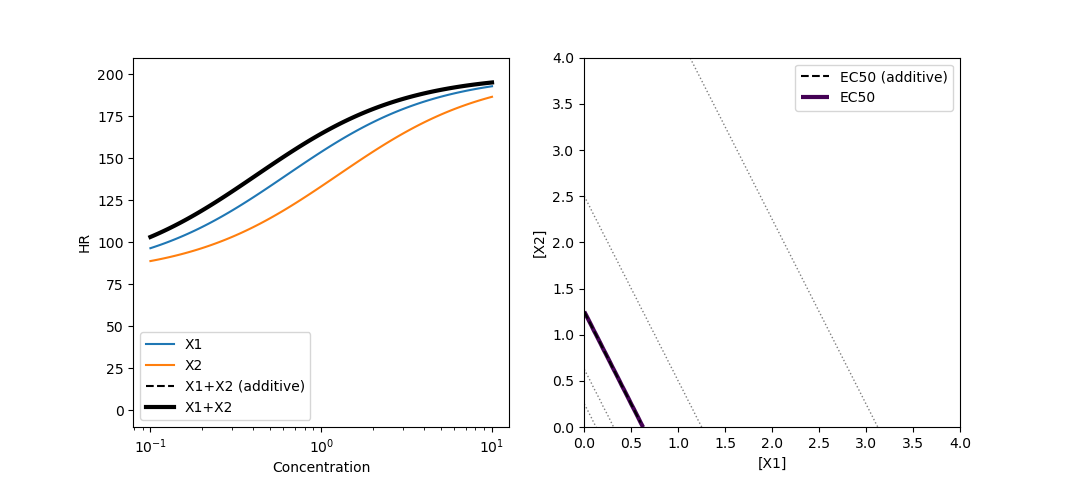

In [5]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4 + x2*2))
plot_effect_and_isobole(f_1, f_2, f_sum)

### Antagonism

/tmp/ipykernel_539624/3509203429.py:23: UserWarning: No contour levels were found within the data range.
  ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)


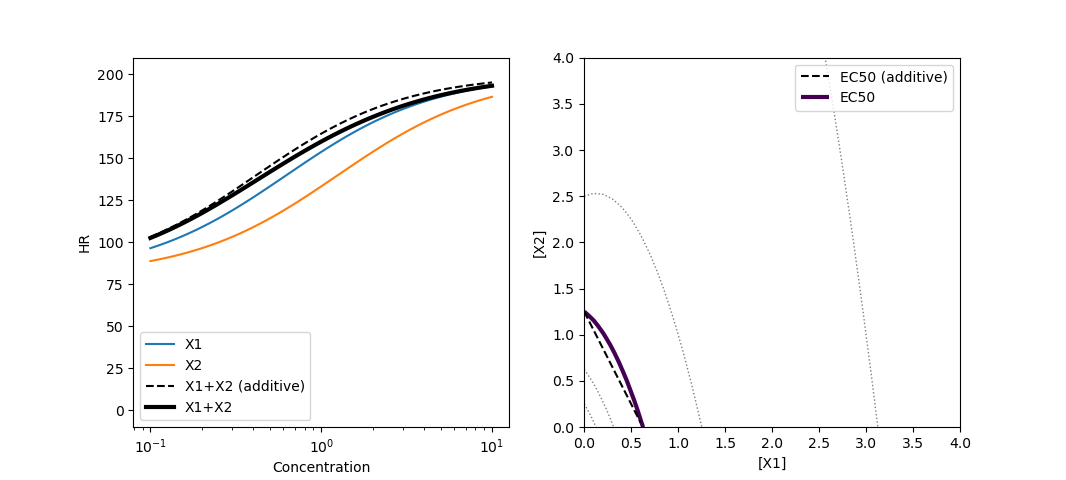

In [6]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4 + x2*2/(1 + x1)))
plot_effect_and_isobole(f_1, f_2, f_sum)

/tmp/ipykernel_539624/3509203429.py:23: UserWarning: No contour levels were found within the data range.
  ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)


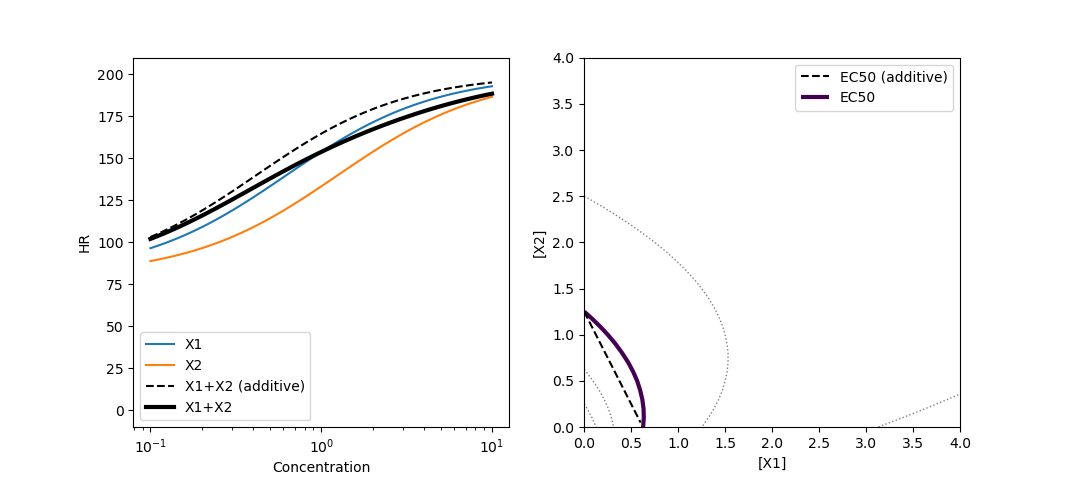

In [13]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4/(1 + x2) + x2*2))
plot_effect_and_isobole(f_1, f_2, f_sum)

/tmp/ipykernel_539624/3509203429.py:23: UserWarning: No contour levels were found within the data range.
  ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)


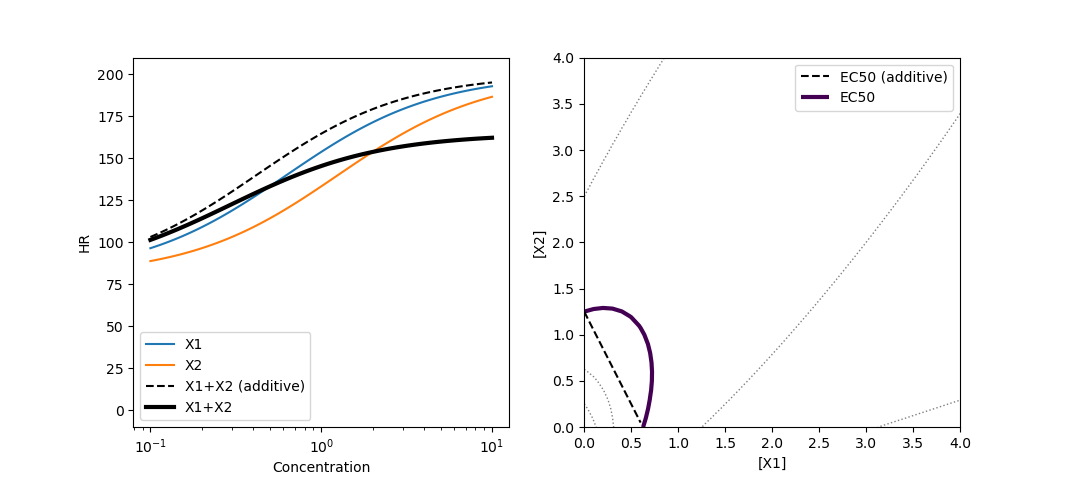

In [8]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4/(1 + x2) + x2*2/(1 + x1)))
plot_effect_and_isobole(f_1, f_2, f_sum)

### Synergism

/tmp/ipykernel_539624/3509203429.py:23: UserWarning: No contour levels were found within the data range.
  ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)


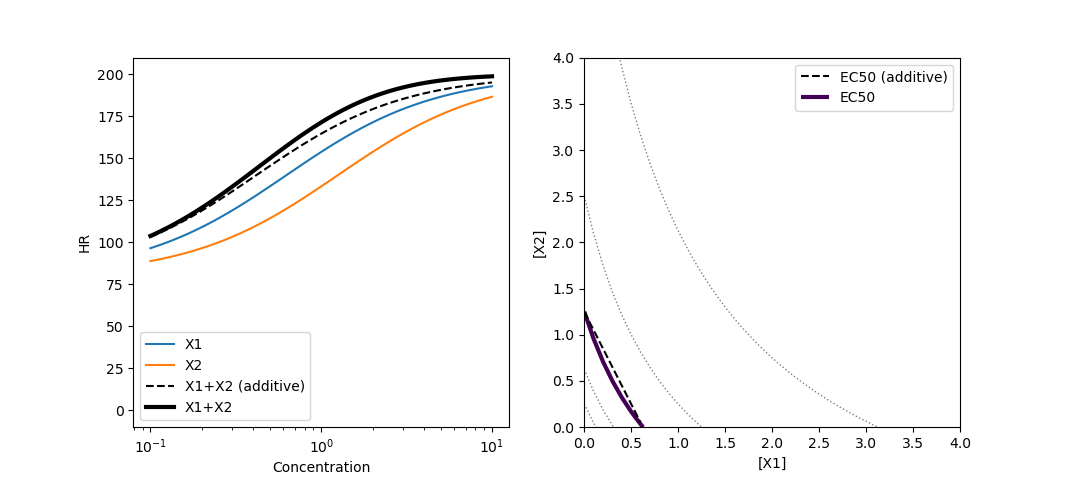

In [9]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4 + x2*2*(1 + x1)))
plot_effect_and_isobole(f_1, f_2, f_sum)

/tmp/ipykernel_539624/3509203429.py:23: UserWarning: No contour levels were found within the data range.
  ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)


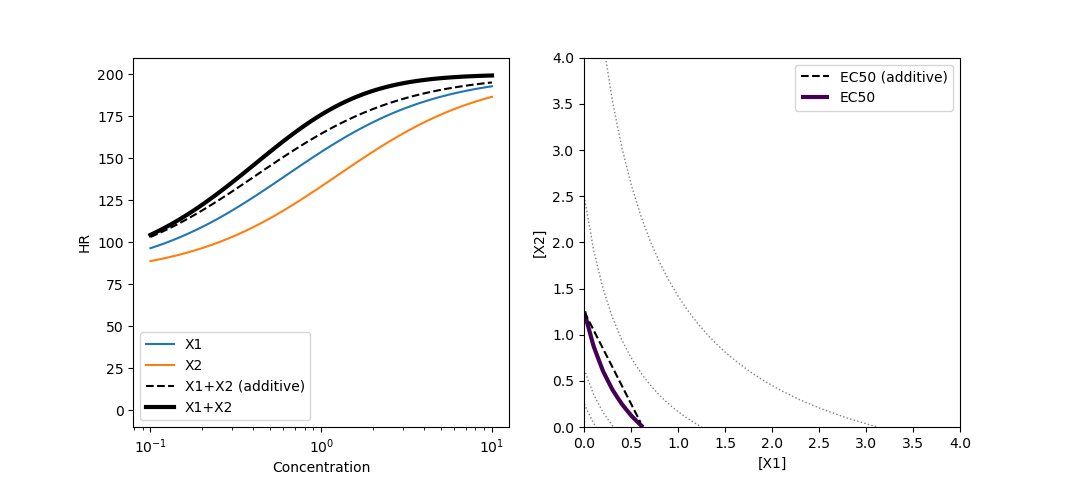

In [12]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4*(1 + x2) + x2*2))
plot_effect_and_isobole(f_1, f_2, f_sum)

/tmp/ipykernel_539624/3509203429.py:23: UserWarning: No contour levels were found within the data range.
  ax2.contour(X1, X2, f_sum(X1, X2), [80], colors='tab:grey', linewidths=1)


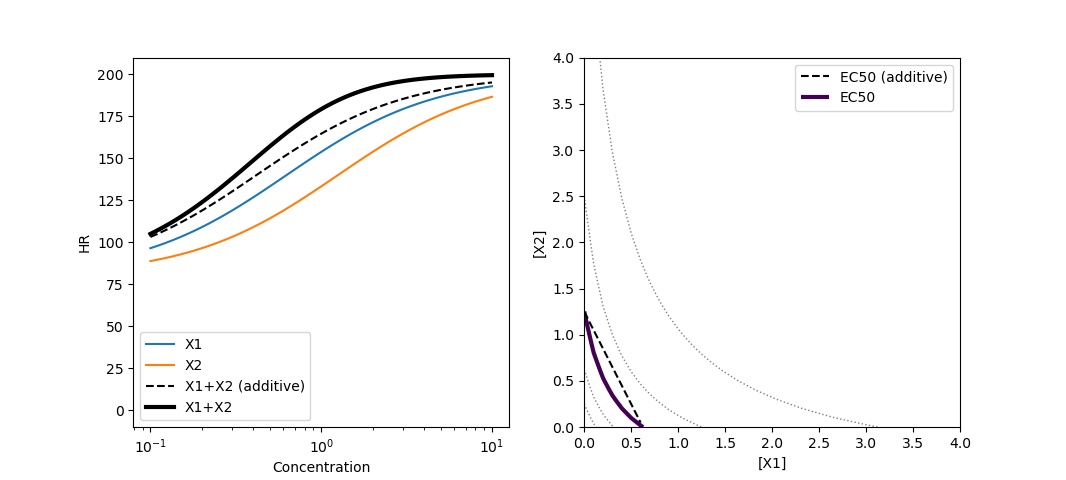

In [11]:
f_sum = lambda x1, x2: 200 * Hill(2/3 * (1 + x1*4*(1 + x2) + x2*2*(1 + x1)))
plot_effect_and_isobole(f_1, f_2, f_sum)